In [13]:
from pylab import plt
import pandas as pd
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sc
from pylab import mpl
import scipy.integrate as sci
import scipy.stats as scs
import pandas_datareader as web
import statsmodels.api as sm
import enum
import scipy.optimize as spo
from numpy.fft import *
from yahoo_fin import options
from dawp import *
from mystic.solvers import fmin, fmin_powell, diffev, diffev2, sparsity,lattice
import math
import sys
import yfinance as yf

sys.path.append('../')
sys.path.append('C:/Users/kiedy/dx')

import autograd.numpy as agnp
from autograd import grad

np.set_printoptions(suppress=True, formatter={'all': lambda x: '%5.4f' % x})

In [14]:
options1=pd.DataFrame([43.10, 35.60, 22.90, 20.20, 13.30],
                     columns=['price'])
options1['strike']=(1090,1100,1120,1125,1140)
options1['maturity']=dt.datetime(2002,5,17)
options1['T']=0.088


options2=pd.DataFrame([84.50, 64.30, 39.50, 33.50, 30.70, 28.00,  25.60, 23.20,19.10,15.30,12.10,10.90],
                     columns=['price'])
options2['strike']=(1050,1075,1110,1120,1125,1130,1135,1140,1150,1160,1170,1175)
options2['maturity']=dt.datetime(2002,6,21)
options2['T']=0.184


options3=pd.DataFrame([161.60, 144.80, 120.10, 100.70, 82.50,65.50,51.00,45.50,38.10,27.70,19.60,13.20],
                     columns=['price'])
options3['strike']=(975,995,1025,1050,1075,1100,1125,1135,1150,1175,1200,1225)
options3['maturity']=dt.datetime(2002,9,20)
options3['T']=0.436



options4=pd.DataFrame([173.30,157.00,133.10,114.80,97.60,81.20,66.90,58.90,53.90,42.50,33.00,24.90,18.30,13.20],
                     columns=['price'])
options4['strike']=(975,995,1025,1050,1075,1100,1125,1140,1150,1175,1200,1225,1250,1275)
options4['maturity']=dt.datetime(2002,12,20)
options4['T']=0.692


options5=pd.DataFrame([146.50,96.20,81.70,68.30,56.60,46.10,36.90,29.30,22.50,17.20,12.80],
                     columns=['price'])
options5['strike']=(1025,1100,1125,1150,1175,1200,1225,1250,1275,1300,1325)
options5['maturity']=dt.datetime(2003,3,21)
options5['T']=0.936


options6=pd.DataFrame([182.10,143.00,111.30,97.00,83.30,60.90,49.80,41.20,27.10,17.10,10.10],
                     columns=['price'])
options6['strike']=(995,1050,1100,1125,1150,1200,1225,1250,1300,1350,1400)
options6['maturity']=dt.datetime(2003,6,20)
options6['T']=1.192

options7=pd.DataFrame([171.40,140.40,112.80,99.80,66.90,49.50,35.70,25.20,17.00,12.20],
                     columns=['price'])
options7['strike']=(1050,1100,1150,1175,1250,1300,1350,1400,1450,1500)
options7['maturity']=dt.datetime(2003,12,19)
options7['T']=1.708

frames=[options1, options2, options3, options4, options5, options6, options7]

options=pd.concat(frames, ignore_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

r=0.019
q=0.012
S0=1124.47
i = np.complex(0.0, 1.0)

options

,price,strike,maturity,T
0,43.1,1090,2002-05-17,0.088
1,35.6,1100,2002-05-17,0.088
2,22.9,1120,2002-05-17,0.088
3,20.2,1125,2002-05-17,0.088
4,13.3,1140,2002-05-17,0.088
5,84.5,1050,2002-06-21,0.184
6,64.3,1075,2002-06-21,0.184
7,39.5,1110,2002-06-21,0.184
8,33.5,1120,2002-06-21,0.184
9,30.7,1125,2002-06-21,0.184


# Wzór analitczny

In [15]:
def value(K, sigma, T):
        ''' Returns option value.
        '''
        d1 = ((np.log(S0 / K) +
               (r-q + 0.5 * sigma ** 2) * T) /
              (sigma * np.sqrt(T)))
        d2 = ((np.log(S0 / K) +
               (r-q - 0.5 * sigma ** 2) * T) /
              (sigma * np.sqrt(T)))
        value = (S0*np.exp(-q*T) * scs.norm.cdf(d1, 0.0, 1.0) -
                 K * np.exp(-r * T) * scs.norm.cdf(d2, 0.0, 1.0))
        return value

In [4]:
m=0
def BS_error_function(p0):
    sigma = p0
    global m
    se = []
    for row, option in options.iterrows():
        model_value = value(option['strike'],sigma ,option['T'])
        se.append((model_value - option['price']) ** 2)
    RMSE =(sum(se) / len(se))**0.5 
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % RMSE)
        
    m += 1
    return RMSE

In [5]:
def BS_calibration_full():
    global opt
    p0 = spo.brute(BS_error_function, ((0.001, 0.401,0.1),), finish=None)
    opt = spo.fmin(BS_error_function, p0, xtol=0.000001, ftol=0.000001, maxiter=None, maxfun=None)
    return opt

BS_calibration_full()

   0 | [0.0010] |  44.654
   1 | [0.1010] |  26.409
   2 | [0.2010] |   9.803
   3 | [0.3010] |  44.075
   4 | [0.2010] |   9.803
   5 | [0.2111] |  12.630
   6 | [0.1910] |   7.636
   7 | [0.1809] |   6.739
   8 | [0.1608] |   9.534
   9 | [0.1708] |   7.523
  10 | [0.1909] |   7.636
  11 | [0.1759] |   6.932
  12 | [0.1859] |   6.985
  13 | [0.1784] |   6.781
  14 | [0.1834] |   6.808
  15 | [0.1796] |   6.746
  16 | [0.1822] |   6.760
  17 | [0.1803] |   6.739
  18 | [0.1815] |   6.746
  19 | [0.1806] |   6.738
  20 | [0.1803] |   6.739
  21 | [0.1807] |   6.738
  22 | [0.1804] |   6.739
  23 | [0.1807] |   6.738
  24 | [0.1805] |   6.738
  25 | [0.1806] |   6.738
  26 | [0.1805] |   6.738
  27 | [0.1806] |   6.738
  28 | [0.1806] |   6.738
  29 | [0.1806] |   6.738
  30 | [0.1806] |   6.738
  31 | [0.1806] |   6.738
  32 | [0.1806] |   6.738
  33 | [0.1806] |   6.738
  34 | [0.1806] |   6.738
  35 | [0.1806] |   6.738
  36 | [0.1806] |   6.738
  37 | [0.1806] |   6.738
Optimization

array([0.1806])

# Metoda COS

In [16]:
def cf(u, T,r,sigma):
    ''' Funkcja charakterystyczna w modelu Blacka-Scholesa '''
    b = r - q  - 0.5 * sigma ** 2
    value = np.exp(T*(1j * u * b - 0.5 * u ** 2 * sigma ** 2))
    return value

In [17]:
N=2**12
L=10
    
def CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma,N,L,CALL):


    # cf   - Characteristic function is a function, in the book denoted by \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - Interest rate (constant)
    # T    - Time to maturity
    # K    - List of strikes
    # N    - Number of expansion terms
    # L    - Size of truncation domain (typ.:L=8 or L=10)
        
    # Reshape K to become a column vector

    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
        
    x0 = np.log(S0 / K)
    
    # kumulanty z automatycznego różniczkowania


    # kumulanty z metody różnic skończonych
    c1 = r - q - 0.5 * sigma ** 2
    c2 = T * sigma ** 2

    a=c1+x0-L*np.sqrt(c2)
    b=c1+x0+L*np.sqrt(c2)
    # Summation from k = 0 to k=N-1

    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for put prices  

    H_k = CallPutCoefficients(a,b,k)   
    mat = np.exp(1j * np.outer((x0 - a) , u))
    temp = cf(u, T,r,sigma) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T) * K * np.real(mat.dot(temp))
    if CALL == True:
        return  value + np.exp(-q*T)*S0 - K*np.exp(-r*T)
    else:
        return value

# Determine coefficients for put prices 

def CallPutCoefficients(a,b,k):
    
    c = a
    d = 0.0
    coef = Chi_Psi(a,b,c,d,k)
    Chi_k = coef["chi"]
    Psi_k = coef["psi"]
    if a<b and b<0.0:
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k) 
    elif a>0 and a<b:
        H_k = np.zeros([len(k),1])
    else:
        H_k = 2.0 / (b - a) * (- Chi_k + Psi_k)
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value

In [18]:
T = 1 
K = 1100

# Parametry z kalibracji:
S0 = 1124.47
r = 0.019
q = 0.012

sigma = 0.1329


print(value(K, sigma, T))
print(CallPutOptionPriceCOSMthd(cf,S0,r,T,(K,),sigma,N,L,True))

75.27675663265586
[[75.2768]]


In [8]:
m=0
def BS_error_function(p0):
    
    global m
    sigma=p0
    se = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,S0,r,option['T'],(option['strike'],),sigma,N,L,True)[0][0]
        se.append((model_value - option['price']) ** 2)

    RMSE = (sum(se) / len(se))**0.5
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % RMSE)
        
    m += 1
    return RMSE

In [9]:
BS_calibration_full()

   0 | [0.0010] |  44.832
   1 | [0.1010] |  26.409
   2 | [0.2010] |   9.803
   3 | [0.3010] |  44.075
   4 | [0.2010] |   9.803
   5 | [0.2111] |  12.630
   6 | [0.1910] |   7.636
   7 | [0.1809] |   6.739
   8 | [0.1608] |   9.534
   9 | [0.1708] |   7.523
  10 | [0.1909] |   7.636
  11 | [0.1759] |   6.932
  12 | [0.1859] |   6.985
  13 | [0.1784] |   6.781
  14 | [0.1834] |   6.808
  15 | [0.1796] |   6.746
  16 | [0.1822] |   6.760
  17 | [0.1803] |   6.739
  18 | [0.1815] |   6.746
  19 | [0.1806] |   6.738
  20 | [0.1803] |   6.739
  21 | [0.1807] |   6.738
  22 | [0.1804] |   6.739
  23 | [0.1807] |   6.738
  24 | [0.1805] |   6.738
  25 | [0.1806] |   6.738
  26 | [0.1805] |   6.738
  27 | [0.1806] |   6.738
  28 | [0.1806] |   6.738
  29 | [0.1806] |   6.738
  30 | [0.1806] |   6.738
  31 | [0.1806] |   6.738
  32 | [0.1806] |   6.738
  33 | [0.1806] |   6.738
  34 | [0.1806] |   6.738
  35 | [0.1806] |   6.738
  36 | [0.1806] |   6.738
  37 | [0.1806] |   6.738
Optimization

array([0.1806])

# Wykres

In [10]:
def BS_calculate_model_values(p0):
    ''' Calculates all model values given parameter vector p0. '''
  
    sigma = p0
    values = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,S0,r,option['T'],(option['strike'],),sigma,N,L,True)
        values.append(model_value)
    return np.array(values)

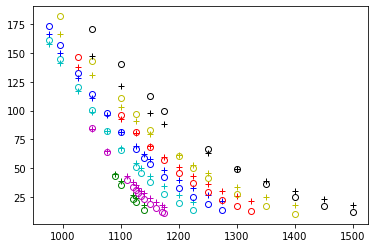

In [11]:
model_value=BS_calculate_model_values(opt)
model_value=model_value.reshape([len(model_value),1])
model_value=pd.DataFrame(model_value)
model_value

plt.plot(options1['strike'], options1['price'], 'go', fillstyle='none', label='cena rynkowa')
plt.plot(options1['strike'], model_value.iloc[0:5], 'g+', fillstyle='none', label='cena rynkowa')

plt.plot(options2['strike'], options2['price'], 'mo', fillstyle='none', label='cena rynkowa')
plt.plot(options2['strike'], model_value.iloc[5:17], 'm+', fillstyle='none', label='cena rynkowa')

plt.plot(options3['strike'], options3['price'], 'co', fillstyle='none', label='cena rynkowa')
plt.plot(options3['strike'], model_value.iloc[17:29], 'c+', fillstyle='none', label='cena rynkowa')


plt.plot(options4['strike'], options4['price'], 'bo', fillstyle='none', label='cena rynkowa')
plt.plot(options4['strike'], model_value.iloc[29:43], 'b+', fillstyle='none', label='cena rynkowa')

plt.plot(options5['strike'], options5['price'], 'ro', fillstyle='none', label='cena rynkowa')
plt.plot(options5['strike'], model_value.iloc[43:54], 'r+', fillstyle='none', label='cena rynkowa')

plt.plot(options6['strike'], options6['price'], 'yo', fillstyle='none', label='cena rynkowa')
plt.plot(options6['strike'], model_value.iloc[54:65], 'y+', fillstyle='none', label='cena rynkowa')

plt.plot(options7['strike'], options7['price'], 'ko', fillstyle='none', label='cena rynkowa')
plt.plot(options7['strike'], model_value.iloc[65:], 'k+', fillstyle='none', label='cena rynkowa')

# plt.savefig("Black-Scholes.png", dpi=300)
